In [1]:
import numpy as np
import matplotlib.tri as tri
import matplotlib.pyplot as plt

In [2]:
# create triangulation data
x = np.array([0, 1, 2, 3, 0.5, 1.5, 2.5, 1, 2, 1.5])
y = np.array([0, 0, 0, 0, 1.0, 1.0, 1.0, 2, 2, 3.0])
triangles = [
    [0, 1, 4],
    [1, 2, 5],
    [2, 3, 6],
    [1, 5, 4],
    [2, 6, 5],
    [4, 5, 7],
    [5, 6, 8],
    [5, 8, 7],
    [7, 8, 9]
]

triang = tri.Triangulation(x, y, triangles)

In [3]:
# interpolate to regularly-spaced quad grid
z = np.cos(1.5 * x) * np.cos(1.5 * y)
xi, yi = np.meshgrid(np.linspace(0, 3, 20), np.linspace(0, 3, 20))

In [4]:
interp_linear = tri.LinearTriInterpolator(triang, z)
zi_linear = interp_linear(xi, yi)

In [5]:
interp_cubic_geometric = tri.CubicTriInterpolator(triang, z, kind="geom")
zi_cubic_geometric = interp_cubic_geometric(xi, yi)

In [6]:
interp_cubic_min_e = tri.CubicTriInterpolator(triang, z, kind="min_E")
zi_cubic_min_e = interp_cubic_min_e(xi, yi)

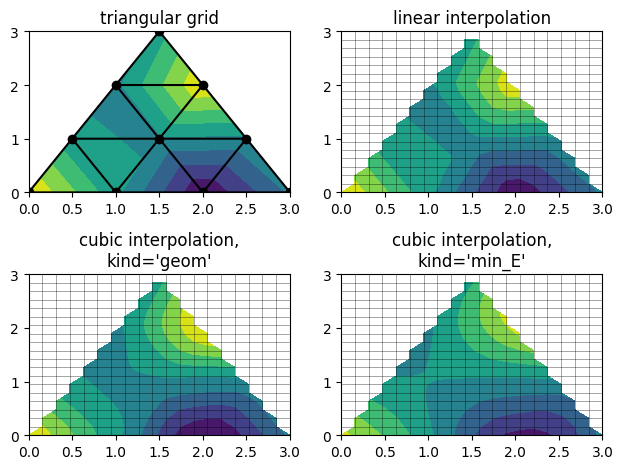

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=2)
axs = axs.flatten()

# plot the triangulation
axs[0].tricontourf(triang, z)
axs[0].triplot(triang, "ko-")
axs[0].set_title("triangular grid")

# plot linear interpolation to quad grid
axs[1].contourf(xi, yi, zi_linear)
axs[1].plot(xi, yi, "k-", lw=0.5, alpha=0.5)
axs[1].plot(xi.T, yi.T, "k-", lw=0.5, alpha=0.5)
axs[1].set_title("linear interpolation")

# plot cubic interpolation to quad grid, kind=geom
axs[2].contourf(xi, yi, zi_cubic_geometric)
axs[2].plot(xi, yi, "k-", lw=0.5, alpha=0.5)
axs[2].plot(xi.T, yi.T, "k-", lw=0.5, alpha=0.5)
axs[2].set_title("cubic interpolation,\nkind='geom'")

# plot cubic interpolation to quad grid, kind=min_E
axs[3].contourf(xi, yi, zi_cubic_min_e)
axs[3].plot(xi, yi, "k-", lw=0.5, alpha=0.5)
axs[3].plot(xi.T, yi.T, "k-", lw=0.5, alpha=0.5)
axs[3].set_title("cubic interpolation,\nkind='min_E'")

fig.tight_layout()
plt.show()